In [100]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import Iris Data
---
This is a multiclassification

In [101]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [102]:
X.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [103]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [104]:
# data

In [105]:
y = y.copy()
y['class'] = y['class'].replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

/tmp/ipython-input-1168616893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({


# Exploratory Data Analysis
----

In [106]:
eda = X.copy()
eda["species"] = y
eda.head()

,sepal length,sepal width,petal length,petal width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [107]:
corr = eda.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [108]:
# convert to a pytorch tensor
data = torch.tensor(X.values).float()
data

tensor([[0.2222, 0.6250, 0.0678, 0.0417],
        [0.1667, 0.4167, 0.0678, 0.0417],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.0833, 0.4583, 0.0847, 0.0417],
        [0.1944, 0.6667, 0.0678, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.0833, 0.5833, 0.0678, 0.0833],
        [0.1944, 0.5833, 0.0847, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.3056, 0.7083, 0.0847, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.0000, 0.4167, 0.0169, 0.0000],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3889, 1.0000, 0.0847, 0.1250],
        [0.3056, 0.7917, 0.0508, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0833],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.2222, 0.7500, 0.0847, 0.0833],
        [0.3056, 0.5833, 0.1186, 0.0417],
        [0.2222, 0.7083, 0.0847, 0.1250],
        [0.0833, 0.6667, 0.0000, 0.0417],
        [0.2222, 0.5417, 0.1186, 0

In [109]:
labels = torch.tensor(y['class'].values).long()
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Functions to create and train the model

In [110]:
def createModel(nHidden):
    model = nn.Sequential(
        nn.Linear(4, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, 3)
    )
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    return model, lossfunc, optimizer

In [111]:
def train(model, lossfunc, optimizer, data, labels, epochs=150):
    for epoch in range(epochs):
        pred = model(data)
        loss = lossfunc(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        predictions = model(data)
        pred_labels = torch.argmax(predictions, axis=1)
        accuracy = 100 * torch.mean((pred_labels == labels).float())
    return accuracy.item()

# Perform the experiment

In [112]:
epochs = 150
numhiddens = np.arange(1, 129)
accuracies = []

for units in numhiddens:
    model, lossfunc, optimizer = createModel(units)
    acc = train(model, lossfunc, optimizer, data, labels, epochs)
    accuracies.append(acc)


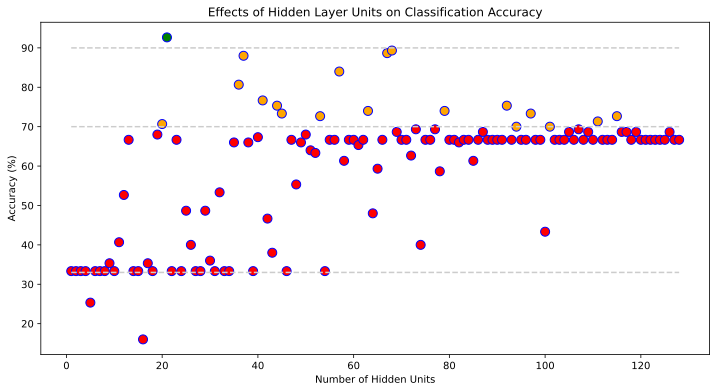

In [113]:
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(accuracies)):
    if accuracies[i] < 70:
        color = 'red'
    elif 70 <= accuracies[i] <= 90:
        color = 'orange'
    else:
        color = 'green'
    ax.plot(numhiddens[i], accuracies[i], 'o-', color='blue', markerfacecolor=color, markersize=9)

# reference lines
ax.plot([numhiddens[0], numhiddens[-1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot([numhiddens[0], numhiddens[-1]], [70, 70], '--', color=[.8, .8, .8])
ax.plot([numhiddens[0], numhiddens[-1]], [90, 90], '--', color=[.8, .8, .8])

# labels
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Effects of Hidden Layer Units on Classification Accuracy')
plt.show()

# Experiments

1. Try changing the data type of the label from integer to float, and compare the result with the original.
2. Perform an experiment that will relate the varying values of learning rate and number of hidden units, and epoch. Create a bubble chart with the x-axis as the number of units, the y-axis as the learning rate, the size as the number of epochs, and the color as the accuracy.

/tmp/ipython-input-414459968.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({


Running Experiment 1 — Label Type Comparison
Accuracy (Integer labels): 43.33%
Float label training result: expected scalar type Long but found Float

Running Experiment 2 — Learning Rate, Hidden Units, Epochs


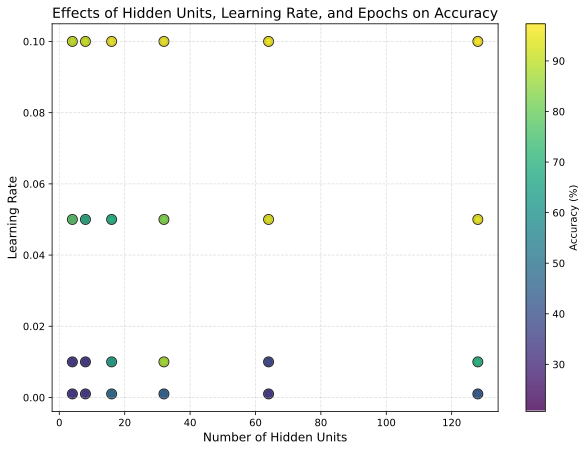


Top 10 Highest Accuracies:


,HiddenUnits,LearningRate,Epochs,Accuracy
71,128,0.10,200,97.333336
62,16,0.10,200,96.666664
65,32,0.10,200,96.666664
70,128,0.10,100,96.666664
53,128,0.05,200,96.000000
68,64,0.10,200,96.000000
50,64,0.05,200,95.333328
67,64,0.10,100,94.666664
59,8,0.10,200,92.666664
56,4,0.10,200,92.000000


In [115]:
# Trying the Experiments
# EXPERIMENTS ON MLP — EFFECTS OF LABEL TYPE, LR, HIDDEN UNITS, EPOCHS

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# fetching preprocessed data
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# normalize input features
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# encode target labels
y = y.copy()
y['class'] = y['class'].replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

data = torch.tensor(X.values).float()
labels_int = torch.tensor(y['class'].values).long()   # correct
labels_float = torch.tensor(y['class'].values).float()  # incorrect (for experiment)

def createModel(nHidden, lr):
    model = nn.Sequential(
        nn.Linear(4, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, 3)
    )
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    return model, lossfunc, optimizer

# training
def train(model, lossfunc, optimizer, data, labels, epochs=100):
    for epoch in range(epochs):
        pred = model(data)
        loss = lossfunc(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        predictions = model(data)
        pred_labels = torch.argmax(predictions, axis=1)
        accuracy = 100 * torch.mean((pred_labels == labels).float())
    return accuracy.item()

# EXPERIMENT 1: LABEL TYPE COMPARISON
print("Running Experiment 1 — Label Type Comparison")
model1, loss1, opt1 = createModel(16, 0.01)
acc_int = train(model1, loss1, opt1, data, labels_int, 150)

model2, loss2, opt2 = createModel(16, 0.01)
try:
    acc_float = train(model2, loss2, opt2, data, labels_float, 150)
except Exception as e:
    acc_float = str(e)

print(f"Accuracy (Integer labels): {acc_int:.2f}%")
print(f"Float label training result: {acc_float}")

# EXPERIMENT 2: LR × HIDDEN UNITS × EPOCHS — BUBBLE PLOT
print("\nRunning Experiment 2 — Learning Rate, Hidden Units, Epochs")

learning_rates = [0.001, 0.01, 0.05, 0.1]
hidden_units = [4, 8, 16, 32, 64, 128]
epoch_list = [50, 100, 200]

results = []

for lr in learning_rates:
    for hu in hidden_units:
        for ep in epoch_list:
            model, lossfunc, optimizer = createModel(hu, lr)
            acc = train(model, lossfunc, optimizer, data, labels_int, ep)
            results.append([hu, lr, ep, acc])

# convert to DataFrame for plotting
df = pd.DataFrame(results, columns=['HiddenUnits', 'LearningRate', 'Epochs', 'Accuracy'])

# BUBBLE CHART visualization
plt.figure(figsize=(10, 7))
bubble = plt.scatter(
    df['HiddenUnits'], df['LearningRate'],
    s=df['Epochs'] * 0.5,  # bubble size
    c=df['Accuracy'], cmap='viridis', alpha=0.8, edgecolors='k'
)

plt.xlabel("Number of Hidden Units", fontsize=12)
plt.ylabel("Learning Rate", fontsize=12)
plt.title("Effects of Hidden Units, Learning Rate, and Epochs on Accuracy", fontsize=14)
plt.colorbar(bubble, label="Accuracy (%)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Display top 10 configurations
print("\nTop 10 Highest Accuracies:")
display(df.sort_values(by="Accuracy", ascending=False).head(10))
